<a href="https://colab.research.google.com/github/willianrocha/bootcamp-datascience-alura/blob/main/module_2/ds_mod2_lecture2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
# Mind the path for the csv file in your gdrive
!cp "/content/drive/MyDrive/alura/bootcamp-data-science/A160324189_28_143_208.csv" .
pd.options.display.float_format = "{:,.2f}".format
dados = pd.read_csv("https://raw.githubusercontent.com/willianrocha/bootcamp-datascience-alura/main/module_1/files/A160324189_28_143_208.csv", encoding="ISO-8859-1",
            skiprows=3, skipfooter=12, sep=";", thousands=".", decimal=",",
            engine='python')
dados.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"8,041,248.80","8,199,032.67","8,363,386.07","7,889,819.50","8,603,943.85","8,048,398.25","8,159,737.49","8,457,455.71","7,766,983.20","8,858,845.57","8,407,076.44","9,492,938.92","8,206,195.92","9,011,612.58","9,124,967.84","8,406,732.72","8,411,360.02","8,651,081.66","8,193,425.99","8,388,269.45","8,645,315.78","9,050,329.13","9,211,262.51","9,490,545.02","8,600,886.20","8,919,190.86","8,909,111.89","8,409,386.09","8,924,348.41","8,948,605.66","8,660,753.05","8,326,416.32","8,413,784.42","7,174,312.31","7,423,678.64","8,581,195.13","9,193,593.76","7,407,388.24",3556381.57,"929,129,659.72"
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"3,355,223.35","3,562,691.54","3,375,296.64","3,341,497.58","3,358,378.05","3,145,385.44","2,638,773.92","2,968,168.75","2,769,797.39","3,057,631.96","2,874,965.31","3,175,575.17","3,060,903.21","3,253,011.61","3,040,645.05","2,926,179.27","3,126,120.64","2,473,454.85","2,277,493.49","2,594,347.32","2,234,388.36","2,473,008.49","2,979,764.77","3,070,533.95","3,249,052.69","3,567,538.64","2,981,072.98","2,998,860.31","3,293,378.97","3,174,249.43","2,959,569.09","3,261,123.88","2,981,264.22","2,859,102.06","2,472,063.08","2,383,895.48","2,199,920.70","1,163,813.08",-,"420,668,039.63"
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"13,718,828.46","14,396,210.86","13,745,304.22","13,979,792.94","13,895,515.90","13,518,116.80","13,635,186.02","14,549,450.86","12,753,555.36","14,749,409.47","14,577,930.81","15,381,061.96","14,653,650.77","15,544,595.79","16,374,961.41","15,343,340.93","16,249,963.61","14,255,408.82","14,274,053.94","15,358,914.00","14,100,074.56","16,103,971.89","16,154,491.82","16,529,976.06","15,509,984.83","16,642,220.71","16,493,719.52","15,346,323.27","16,282,436.68","14,781,332.42","14,923,380.22","15,939,561.23","15,138,110.70","14,773,739.41","16,330,913.81","19,441,150.53","17,509,334.66","13,358,514.02",4726485.73,"1,771,654,871.23"
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"2,699,213.85","2,682,746.28","2,891,100.20","2,737,677.78","2,693,726.29","2,671,451.53","2,688,315.70","2,740,952.07","2,478,349.44","2,674,958.94","2,721,261.19","2,844,811.66","2,967,161.35","2,841,587.97","3,328,230.63","2,878,691.04","2,964,324.32","2,524,712.40","2,462,451.64","2,662,240.18","2,499,996.16","2,846,135.56","2,789,823.29","2,839,389.53","2,647,540.20","2,865,777.71","3,181,321.82","3,070,436.96","3,162,342.44","3,121,104.71","2,889,969.87","3,084,561.08","2,967,159.04","2,813,954.05","2,304,961.42","2,910,776.44","3,216,466.51","2,739,498.41",1524478.04,"305,010,883.18"
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,"31,808,597.47","32,133,134.42","33,770,556.65","32,979,925.38","33,665,042.35","33,475,545.29","32,067,934.67","33,615,836.09","30,623,491.62","34,121,931.00","35,039,954.20","35,424,611.06","34,160,283.18","34,484,949.49","35,618,364.04","34,380,916.90","38,441,090.50","33,583,538.08","32,789,354.87","34,513,534.80","31,885,919.67","33,236,155.79","31,008,924.95","31,

In [6]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
usaveis = dados[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")
ordenado_por_total = usaveis.sort_values("Total", ascending=False)
ordenado_por_total = ordenado_por_total.drop("Total", axis=1)
colunas_interessadas = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessadas]
ordenado_por_total = ordenado_por_total / 10**6
mes_mais_recente = ordenado_por_total.columns[-1]
gastos_do_mais_recente = ordenado_por_total[mes_mais_recente]
# gastos_do_mais_recente.plot(kind='bar')
# df_desafio_4 = gastos_do_mais_recente.copy()

In [7]:
url = 'https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o'
df_pop_por_uf = pd.read_html(url)
df_pop_por_uf = df_pop_por_uf[0]

def clean_n_join(df_dirty, df_ref):
  df_ref_c = df_ref.copy()
  df_dirty_c = df_dirty.copy()
  df_dirty_c = df_dirty_c[["Unidade federativa", "População"]]
  df_dirty_c.columns = ["uf", "populacao"]
  df_dirty_c = df_dirty_c.set_index("uf")
  df_dirty_c = df_dirty_c.dropna()
  df_dirty_c['populacao'] = df_dirty_c['populacao'].str.replace(" ","").astype(int)
  df_dirty_c.index = df_dirty_c.index.str.strip()
  df_ref_c.index = df_ref_c.index.str[3:]
  for estado in df_ref_c.index:
    df_dirty_c.index = df_dirty_c.index.str.replace(f"{estado} {estado}", estado)
  return df_dirty_c.join(df_ref_c)

gastos_e_populacao_recente = clean_n_join(df_pop_por_uf, gastos_do_mais_recente)
# df_desafio_2.head()

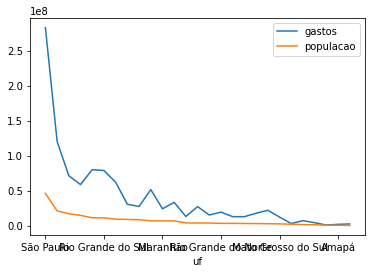

In [8]:
gastos_e_populacao_recente["gastos"] = gastos_e_populacao_recente["2020/Jul"] * 10**6
gastos_e_populacao_recente[["gastos", "populacao"]].plot()

In [9]:
gastos_e_populacao_recente.loc[["Rio Grande do Sul", "São Paulo"]]

,populacao,2020/Jul,gastos
uf,,,
Rio Grande do Sul,11422973,78.93,"78,929,703.81"
São Paulo,46289333,282.71,"282,709,570.31"


In [10]:
gastos_e_populacao_recente["gastos_por_habitante"] = gastos_e_populacao_recente["gastos"] / gastos_e_populacao_recente["populacao"]
gastos_e_populacao_recente.head()

,populacao,2020/Jul,gastos,gastos_por_habitante
uf,,,,
São Paulo,46289333,282.71,"282,709,570.31",6.11
Minas Gerais,21292666,120.47,"120,467,187.34",5.66
Rio de Janeiro,17366189,71.54,"71,540,227.33",4.12
Bahia,14930634,58.90,"58,898,100.40",3.94
Paraná,11516840,80.32,"80,320,852.69",6.97


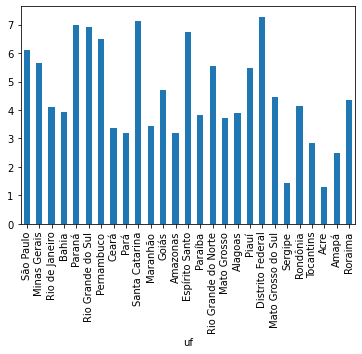

In [11]:
gastos_e_populacao_recente["gastos_por_habitante"].plot(kind='bar')

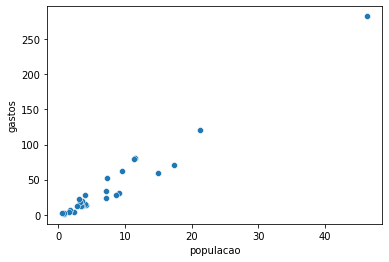

In [12]:
import seaborn as sns

sns.scatterplot(data=gastos_e_populacao_recente / 10**6, x="populacao", y="gastos")

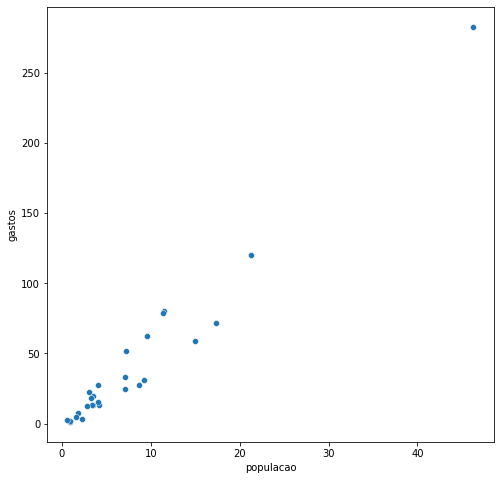

In [13]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=gastos_e_populacao_recente / 10**6, x="populacao", y="gastos")

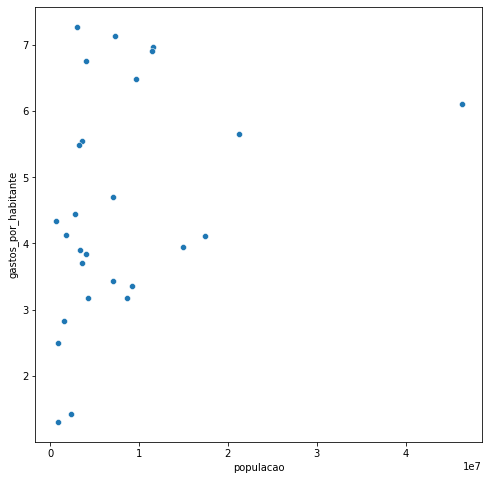

In [14]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=gastos_e_populacao_recente, x="populacao", y="gastos_por_habitante")

# Desafios

## Desafio 01: Ordenar o gráfico e criar uma visualização de gastos por habitantes ordenada.

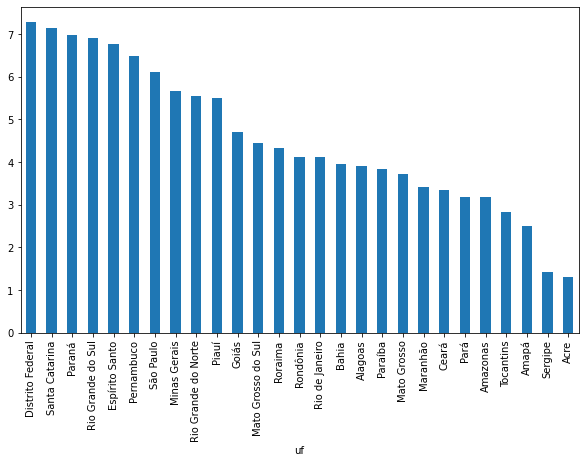

In [15]:
gastos_e_populacao_recente["gastos_por_habitante"].sort_values(ascending=False).plot(kind='bar', figsize=(10,6))

## Desafio 02 (Super Desafio Gui): Fazer os mesmos gráficos do final da aulas 2.1 para meses anteriores, analisar e compartilhar suas hipóteses.

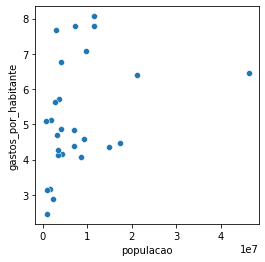

In [16]:
segundo_mes_mais_recente = ordenado_por_total.columns[-2]
df_desafio_2 = ordenado_por_total[segundo_mes_mais_recente]
segundo_gastos_e_populacao_recente = clean_n_join(df_pop_por_uf, df_desafio_2)
segundo_gastos_e_populacao_recente.head()
segundo_gastos_e_populacao_recente["gastos"] = segundo_gastos_e_populacao_recente[segundo_mes_mais_recente] * 10**6
segundo_gastos_e_populacao_recente["gastos_por_habitante"] = segundo_gastos_e_populacao_recente["gastos"] / segundo_gastos_e_populacao_recente["populacao"]
plt.figure(figsize=(4,4))
sns.scatterplot(data=segundo_gastos_e_populacao_recente, x="populacao", y="gastos_por_habitante")

Solução do Gui

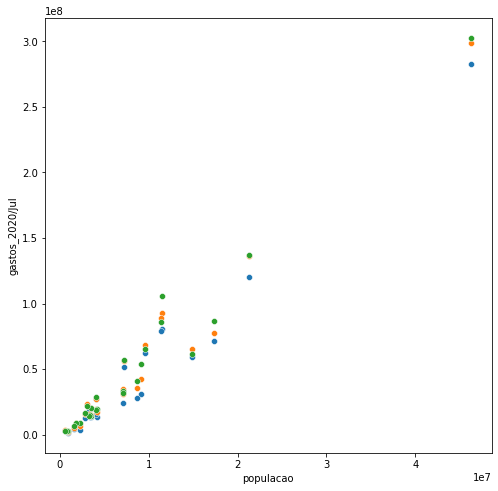

In [26]:
def gasos_e_gasto_por_habitante_para(todos_os_gastos, dados, mes: str):
  dados_c = dados.copy()
  todos_os_gastos_c = todos_os_gastos.copy()
  gastos_do_mes = todos_os_gastos_c[mes]
  gastos_do_mes.index = gastos_do_mes.index.str[3:]
  dados_c[f"gastos_{mes}"] = gastos_do_mes * 10**6
  dados_c[f"gastos_por_habitante_{mes}"] = dados_c[f"gastos_{mes}"] / dados_c["populacao"]
  return dados_c

df_desafio_2 = gasos_e_gasto_por_habitante_para(ordenado_por_total, gastos_e_populacao_recente, "2020/Jul")
df_desafio_2 = gasos_e_gasto_por_habitante_para(ordenado_por_total, df_desafio_2, "2020/Jun")
df_desafio_2 = gasos_e_gasto_por_habitante_para(ordenado_por_total, df_desafio_2, "2020/Mai")
plt.figure(figsize=(8,8))
sns.scatterplot(data=df_desafio_2, x="populacao", y="gastos_2020/Jul")
sns.scatterplot(data=df_desafio_2, x="populacao", y="gastos_2020/Jun")
sns.scatterplot(data=df_desafio_2, x="populacao", y="gastos_2020/Mai")

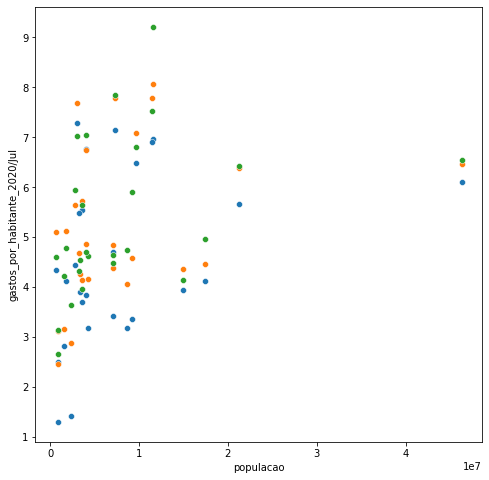

In [27]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=df_desafio_2, x="populacao", y="gastos_por_habitante_2020/Jul")
sns.scatterplot(data=df_desafio_2, x="populacao", y="gastos_por_habitante_2020/Jun")
sns.scatterplot(data=df_desafio_2, x="populacao", y="gastos_por_habitante_2020/Mai")

## Desafio 03 (Super Desafio Thiago): Plotar no mesmos gráficos do final da aula o mês anterior e o mês correte, analisar e compartilhar suas hipóteses.

ATENÇÃO: No próximo vídeo Gui e Thiago resolvem parte do Desafio 2 e 3, aconselhamos fortemente que gastem um tempo tentando resolver antes de assistir o vídeo.

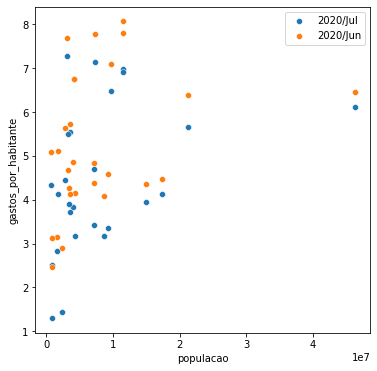

In [18]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=gastos_e_populacao_recente, x="populacao", y="gastos_por_habitante")
sns.scatterplot(data=segundo_gastos_e_populacao_recente, x="populacao", y="gastos_por_habitante")
plt.legend(labels=[mes_mais_recente, segundo_mes_mais_recente])

## Desafio 04 (Próximo Vídeo): Analise os gráficos e tente chegar a hipóteses que explicam o que você está entendendo dos dados. Lembre-se que a conclusão é uma hipótese. E que esses dados serão alterados.